# CLASSIFICATION ON ONLINE REATAIL II DATTASET   

# SOURCE :- https://archive.ics.uci.edu/dataset/502/online+retail+ii

# LOADING DATASET

In [ ]:
!wget "https://archive.ics.uci.edu/static/public/502/online+retail+ii.zip"      #downloading the data

--2023-07-22 13:00:28--  https://archive.ics.uci.edu/static/public/502/online+retail+ii.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail+ii.zip’

online+retail+ii.zi     [      <=>           ]  43.51M  39.8MB/s    in 1.1s    

2023-07-22 13:00:29 (39.8 MB/s) - ‘online+retail+ii.zip’ saved [45622418]



In [ ]:
!unzip "online+retail+ii.zip"                                                   #extracting data

Archive:  online+retail+ii.zip
 extracting: online_retail_II.xlsx   


# DATA ANALYSIS

In [ ]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [ ]:
pd.set_option("display.max_columns",None)
pd.set_option("display.width",1000)

In [ ]:
datasets:list=list()                                                            # to store all sheet as pandas.DataFrame
for sheet in pd.ExcelFile('online_retail_II.xlsx').sheet_names:                 # get all sheet by sheet names from file
  datasets.append(pd.read_excel('online_retail_II.xlsx',sheet_name=sheet))      # read each sheet as pandas.DataFrame and append to datasets list

In [ ]:
if len(datasets)>1:dataset=pd.concat(datasets,ignore_index=True)                # if multiple sheets found (i.e. multiple data-frame) in list then only concatinate all dataframes
else:dataset=datasets[0]                                                        # if only one is sheet found, then no need for concatination
del datasets                                                                    # remove datasets list (not needed)
dataset.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
dataset.shape                                                                   #checking dataset shape

(1067371, 8)

In [ ]:
# Check if the number of unique index values in the dataset is equal to the total number of rows.
len(set(dataset.index))==dataset.shape[0]
dataset.index

RangeIndex(start=0, stop=1067371, step=1)

In [ ]:
dataset.columns                                                                 #check columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country'], dtype='object')

In [ ]:
dataset.info()                                                                  #check dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [ ]:
dataset.dtypes                                                                  #check datatype of columns

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [ ]:
dataset.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [ ]:
dataset.describe(include=object)

,Invoice,StockCode,Description,Country
count,1067371,1067371,1062989,1067371
unique,53628,5305,5698,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1350,5829,5918,981330


In [ ]:
dataset.isna().sum()                                                            #checking null values

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [ ]:
dataset.isna().sum().sum()                                                      #total number of null values

247389

In [ ]:
# as given Has Missing Values: Symbol: 1 (let search for this)
missing_values:list=[1,'1','?','',' ',-999]                                     # list of assumed missing values
for miss_value_type in missing_values:                                          # search for each type of it one by one
  print(f'Missing count for "{miss_value_type}" ({type(miss_value_type)}) is ',
   (dataset==miss_value_type).sum().sum())

Missing count for "1" (<class 'int'>) is  294574
Missing count for "1" (<class 'str'>) is  0
Missing count for "?" (<class 'str'>) is  92
Missing count for "" (<class 'str'>) is  0
Missing count for " " (<class 'str'>) is  0
Missing count for "-999" (<class 'int'>) is  1


In [ ]:
set(dataset['Invoice'])

# DATA PREPROCESSING

In [ ]:
# all the rows in invoice column which has string type data
invoice_strings = dataset.loc[dataset['Invoice'].apply(lambda x: isinstance(x, str))]['Invoice']
#drop these rows from original dataframe
dataset = dataset.drop(invoice_strings.index)

In [ ]:
dataset.shape

(1047871, 8)

In [ ]:
#all datatypes in invoice column
invoice_datatypes = set(dataset['Invoice'].apply(type))
set(invoice_datatypes)

{int}

In [ ]:
dataset.head()
dataset.shape
df=dataset.copy()

In [ ]:
StockCode_strings = dataset.loc[dataset['StockCode'].apply(lambda x: isinstance(x, str))]['StockCode']
len(StockCode_strings)

131556

In [ ]:
# Drop rows with  str type in df in stockCode
df = df.drop(StockCode_strings.index)
df.shape

(916315, 8)

In [ ]:
StockCode_datatypes = set(df['StockCode'].apply(type))
set(StockCode_datatypes)

{int}

In [ ]:
df.groupby('StockCode').count()

,Invoice,Description,Quantity,InvoiceDate,Price,Customer ID,Country
StockCode,,,,,,,
10002,393,391,393,393,393,317,393
10080,31,29,31,31,31,27,31
10109,2,1,2,2,2,1,2
10120,78,78,78,78,78,66,78
10125,181,181,181,181,181,133,181
...,...,...,...,...,...,...,...
90192,57,56,57,57,57,19,57
90194,23,22,23,23,23,14,23
90203,37,35,37,37,37,25,37


In [ ]:
#convert data and time column into proper format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
#extract hour from this and make another columns
df['Hour'] = df['InvoiceDate'].dt.hour
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,7
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,7
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,7


In [ ]:
#extract hour and minute from this and make another columns
df['Minute'] = df['InvoiceDate'].dt.minute

In [ ]:
#drop the rows with customer id as nan
df = df.dropna(subset=['Customer ID'])
df.shape

(714048, 10)

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Hour,Minute
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,7,45
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,7,45
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,7,45
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,7,45
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,7,45


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714048 entries, 0 to 1067369
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      714048 non-null  object        
 1   StockCode    714048 non-null  object        
 2   Description  714048 non-null  object        
 3   Quantity     714048 non-null  int64         
 4   InvoiceDate  714048 non-null  datetime64[ns]
 5   Price        714048 non-null  float64       
 6   Customer ID  714048 non-null  float64       
 7   Country      714048 non-null  object        
 8   Hour         714048 non-null  int64         
 9   Minute       714048 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 59.9+ MB


In [ ]:
d=df.drop(columns=['Invoice','Description','InvoiceDate'])
d.head()

,StockCode,Quantity,Price,Customer ID,Country,Hour,Minute
0,85048,12,6.95,13085.0,United Kingdom,7,45
3,22041,48,2.10,13085.0,United Kingdom,7,45
4,21232,24,1.25,13085.0,United Kingdom,7,45
5,22064,24,1.65,13085.0,United Kingdom,7,45
6,21871,24,1.25,13085.0,United Kingdom,7,45


In [ ]:
#label encode country
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
d['Country'] = le.fit_transform(d['Country'])

In [ ]:
#change dtype of all columns to float
d = d.astype(float)

In [ ]:
d.head()

,StockCode,Quantity,Price,Customer ID,Country,Hour,Minute
0,85048.0,12.0,6.95,13085.0,38.0,7.0,45.0
3,22041.0,48.0,2.10,13085.0,38.0,7.0,45.0
4,21232.0,24.0,1.25,13085.0,38.0,7.0,45.0
5,22064.0,24.0,1.65,13085.0,38.0,7.0,45.0
6,21871.0,24.0,1.25,13085.0,38.0,7.0,45.0


In [ ]:
d.isna().sum()

StockCode      0
Quantity       0
Price          0
Customer ID    0
Country        0
Hour           0
Minute         0
dtype: int64

# TRAINING THE KNN MODEL

In [ ]:
x_data=d.drop(columns=['Country'])
y_data=d['Country']

In [ ]:
#split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [ ]:
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((571238, 6), (142810, 6), (571238,), (142810,))

In [ ]:
#model knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Predict on the train data
y_train_pred = knn.predict(x_train)
#make confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[  1194,      1,      0, ...,      7,      1,      0],
       [     5,    520,      2, ...,     51,      3,      0],
       [     0,      4,     29, ...,      0,      0,      0],
       ...,
       [     2,     20,      0, ..., 512423,     34,      1],
       [     0,      3,      0, ...,    122,    228,      0],
       [     0,      0,      0, ...,     18,      0,     14]])

In [ ]:
#check  accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.9846403775659183

In [ ]:
# Predict on the test data
y_test_pred = knn.predict(x_test)
#make confusion matrix
confusion_matrix(y_test, y_test_pred)

array([[   273,      2,      0, ...,      4,      0,      0],
       [     2,     78,      2, ...,     21,      2,      0],
       [     0,      3,      3, ...,      0,      0,      0],
       ...,
       [     1,     13,      0, ..., 127703,     30,      2],
       [     0,      2,      0, ...,     44,     22,      0],
       [     0,      0,      0, ...,      7,      0,      2]])

In [ ]:
# Check accuracy on test data
accuracy_score(y_test, y_test_pred)

0.9684896015685176

# AUTOMATING CLASSIFICATION WITH TPOT

In [ ]:
# Install tpot on the server
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=1b19801c2bfce93ee0690f689a7d6200b8e914673714b68a4de737385f916409
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
from tpot import TPOTClassifier                                                                    #using tpot to find best model
tp = TPOTClassifier(generations=2, population_size=5, verbosity=2)

In [ ]:
tp.fit(x_test, y_test)  #Selecting the best method

Optimization Progress:   0%|          | 0/15 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9841187591905328

Generation 2 - Current best internal CV score: 0.9841187591905328

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.6500000000000001, min_samples_leaf=16, min_samples_split=12, n_estimators=100)


TPOTClassifier(generations=2, population_size=5, verbosity=2)

In [ ]:
#import decesion tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predict on the train data
y_train_pred_dt = dt.predict(x_train)
# Make confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred_dt)

array([[  1341,      0,      0, ...,      0,      0,      0],
       [     0,    657,      0, ...,      0,      0,      0],
       [     0,      0,     39, ...,      0,      0,      0],
       ...,
       [     0,      0,      0, ..., 513963,      0,      0],
       [     0,      0,      0, ...,      0,    373,      0],
       [     0,      0,      0, ...,      0,      0,     32]])

In [ ]:
# Check accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred_dt)


1.0

In [ ]:
# Predict on the test data
y_test_pred_dt = dt.predict(x_test)
# Make confusion matrix

confusion_matrix(y_test, y_test_pred_dt)

array([[   356,      0,      0, ...,      1,      0,      0],
       [     0,    161,      0, ...,      0,      0,      0],
       [     0,      0,     10, ...,      0,      0,      0],
       ...,
       [     1,      0,      0, ..., 128512,      0,      0],
       [     0,      0,      0, ...,      0,     73,      0],
       [     0,      0,      0, ...,      2,      0,      7]])

In [ ]:
# Check accuracy on test data

accuracy_score(y_test, y_test_pred_dt)

0.9996638890833975

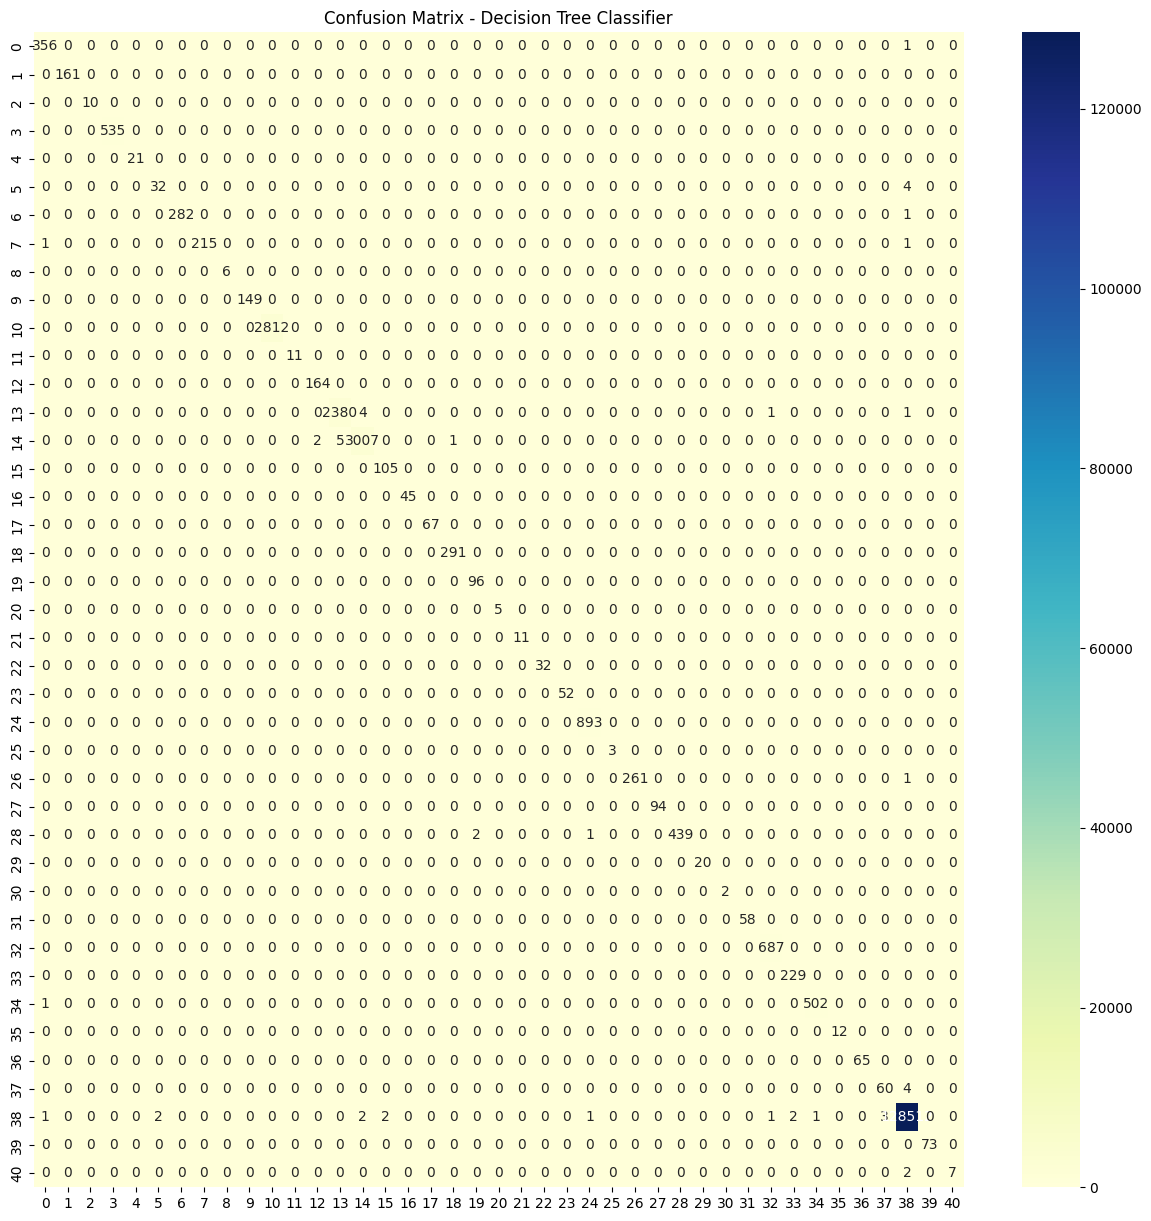

In [ ]:
#make heatmap of confussion matrix
plt.figure(figsize=(15,15))
#replace classes with thier actual names in heatmap
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_test_pred_dt), annot=True, cmap="YlGnBu", fmt="d")
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()